In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [3]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
# Summary statistics for numerical columns
summaryStats = df.describe()
summaryStats

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
# Frequency distribution for categorical columns
categoricalColumns = ['Fuel_Type', 'Automatic', 'Doors']
categoricalSummary = df[categoricalColumns].describe()
categoricalColumns

['Fuel_Type', 'Automatic', 'Doors']

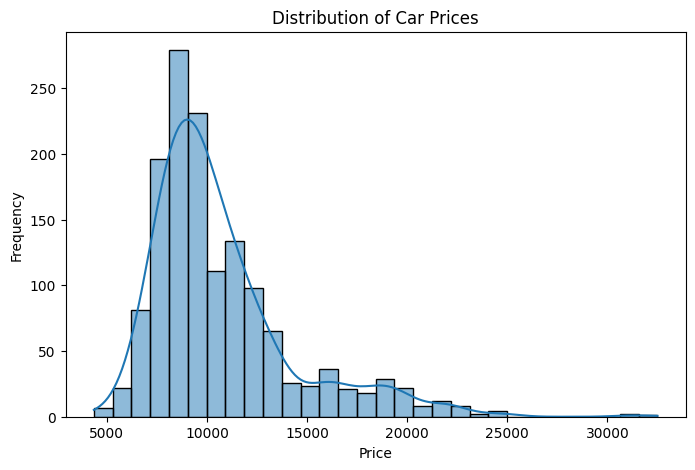

In [6]:
# Plot distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

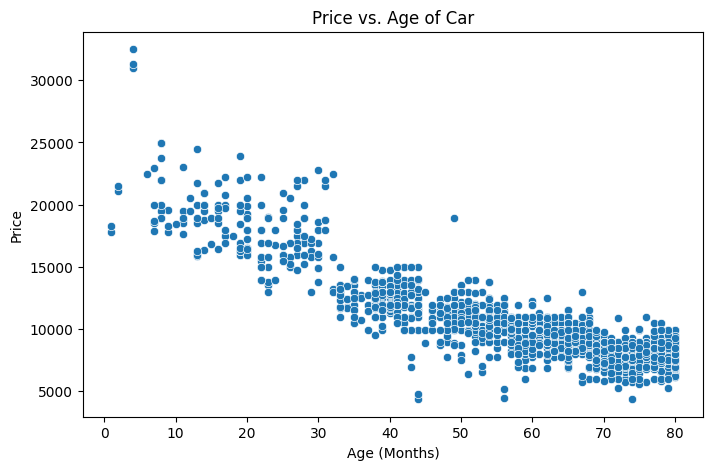

In [7]:
# Scatter plot of Price vs Age_08_04
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age_08_04'], y=df['Price'])
plt.title('Price vs. Age of Car')
plt.xlabel('Age (Months)')
plt.ylabel('Price')
plt.show()

In [8]:
# Correlation heatmap for numerical features
# Select only numerical columns for correlation calculation
numericalcalation_df = df.select_dtypes(include=np.number)

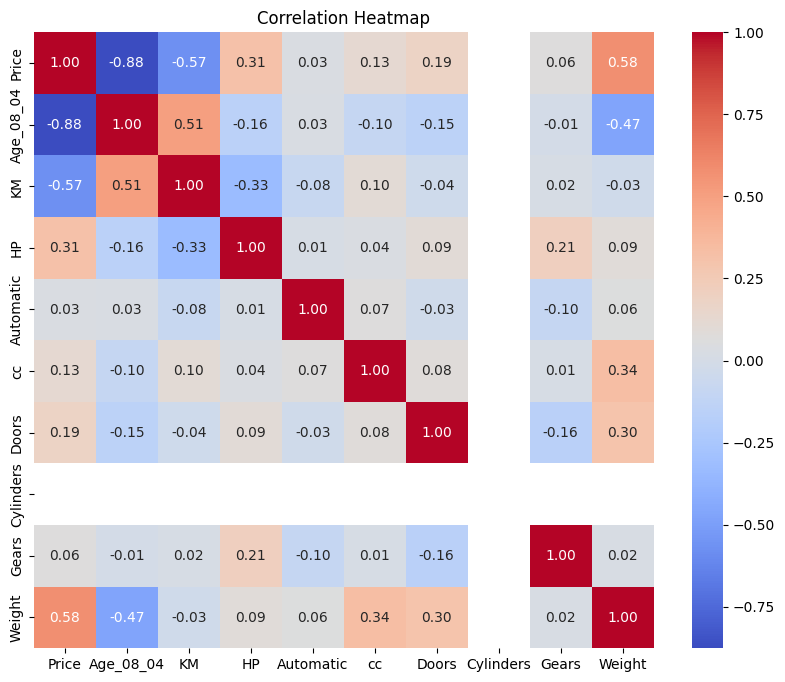

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(numericalcalation_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Displaying summary of statistics and categorical
print("Summary Statistics for Numerical df:\n", summaryStats)
print("\nSummary Statistics for Categorical df:\n", categoricalSummary)

Summary Statistics for Numerical df:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510   

In [13]:
# To Defining features and target considering 'Price' is the target variable
X = df.drop(columns=['Price'])
y = df['Price']

In [14]:
# Splitting the present data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Displaying the shapes of the result data sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

In [16]:
# To Handle the categorical variables (e.g., Fuel_Type) using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type'])

In [19]:
# Splitting the data into features (X) and target variable (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
meanSquareedError1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 (Basic Linear Regression):")
print("Mean Squared Error:", meanSquareedError1)
print("R-squared:", r2_1)

Model 1 (Basic Linear Regression):
Mean Squared Error: 2203043.8231437006
R-squared: 0.8348888040611084


In [26]:
#Model 2: Ridge Regression
model2 = Ridge(alpha=1.0)  # Adjust alpha for regularization
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

meanSquareedError2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("\nModel 2 (Ridge Regression):")
print("Mean Squared Error:", meanSquareedError2)
print("R-squared:", r2_2)


Model 2 (Ridge Regression):
Mean Squared Error: 2198251.1073328047
R-squared: 0.8352480030162173


In [27]:
#Model 3: Feature Selection and Linear Regression
# Let feature importance analysis has been done (e.g., using a tree-based model)
selectedFeatures = ['Age_08_04', 'KM', 'HP', 'Automatic']

X_train_selected = X_train[selectedFeatures]
X_test_selected = X_test[selectedFeatures]

# Ensure the selected features exist
print("Selected Features in X_train:", X_train_selected.columns.tolist())


Selected Features in X_train: ['Age_08_04', 'KM', 'HP', 'Automatic']


In [29]:
model3 = LinearRegression()
model3.fit(X_train_selected, y_train)
y_pred3 = model3.predict(X_test_selected)

meanSquareedError3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("\nModel 3 (Feature Selection and Linear Regression):")
print("Mean Squared Error:", mse3)
print("R-squared:", r2_3)


Model 3 (Feature Selection and Linear Regression):
Mean Squared Error: 2516980.25176151
R-squared: 0.8113602574959727


In [30]:
#Lasso Regression Model

# Generated a Lasso regression model
lassoModel = Lasso(alpha=0.1)
lassoModel.fit(X_train, y_train)

# To Make the predictions and evaluate
y_pred_lasso = lassoModel.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)


Lasso Regression:
Mean Squared Error: 2202923.027002638
R-squared: 0.834897857351427


In [31]:
# Create a Ridge regression model
ridgeModel = Ridge(alpha=1.0)
ridgeModel.fit(X_train, y_train)

# Cal predictions and evaluate
y_pred_ridge = ridgeModel.predict(X_test)
mse_ridgculatee = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print("Mean Squared Error:", mse_ridgculatee)
print("R-squared:", r2_ridge)


Ridge Regression:
Mean Squared Error: 2198251.1073328047
R-squared: 0.8352480030162173
